## Histogram


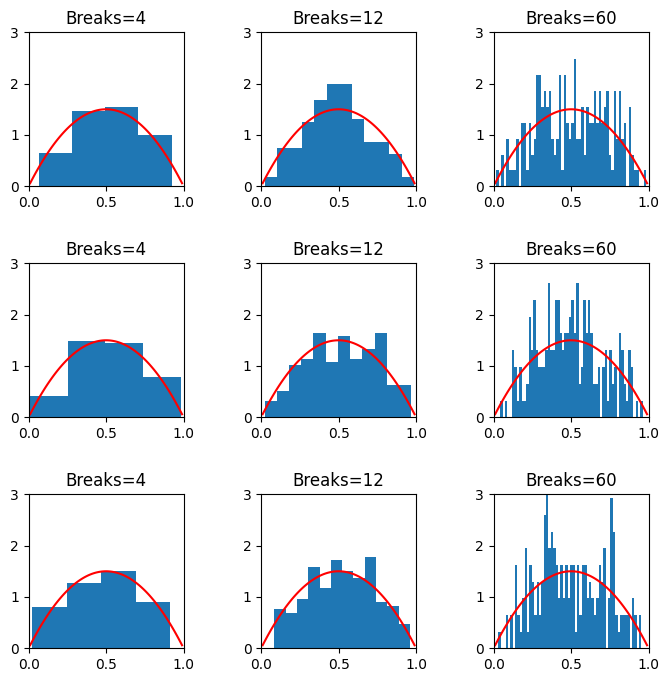

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

n = 200
x_base = np.arange(0.01, 1, 0.01)
breaks_list = [4, 12, 60]

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(8, 8)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axs.flat):
    ii = i // 3
    bb = breaks_list[i % 3]
    x = np.random.beta(2, 2, size=n)
    ax.hist(x, bins=bb, density=True)
    ax.plot(x_base, beta.pdf(x_base, 2, 2), color="red")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3)
    ax.set_title(f"Breaks={bb}")

plt.show()

## Lasso

In [2]:
import numpy as np
from scipy.linalg import pinv
from sklearn.linear_model import LassoCV, Lasso

# Set up the data
n = 40
p = 50

# the first 10 variables are important
b0 = np.concatenate([np.ones(10), np.zeros(p - 10)])
x = np.random.normal(size=(n, p))
y = np.dot(x, b0) + np.random.normal(size=n)


In [3]:

# OLS
ols = np.dot(pinv(np.dot(x.T, x)), np.dot(x.T, y))

# Lasso
lasso_cv = LassoCV(cv=5).fit(x, y)
lasso_result = Lasso(alpha=lasso_cv.alpha_).fit(x, y)

lasso_result.coef_


array([ 0.5612007 ,  0.13738288,  0.93459889,  0.87519446,  0.91475813,
        0.88118153,  1.01150372,  1.32776465,  0.56987281,  0.52525891,
       -0.        , -0.        ,  0.        ,  0.        , -0.18778054,
        0.        , -0.37870728, -0.        , -0.26407946, -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.03006162,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.11818561, -0.        , -0.        , -0.        ,
        0.        ,  0.00794923,  0.        , -0.        , -0.03108868,
        0.14477345,  0.29574883,  0.12153268,  0.        ,  0.        ,
       -0.06808034, -0.        , -0.16608604,  0.04525257,  0.        ])

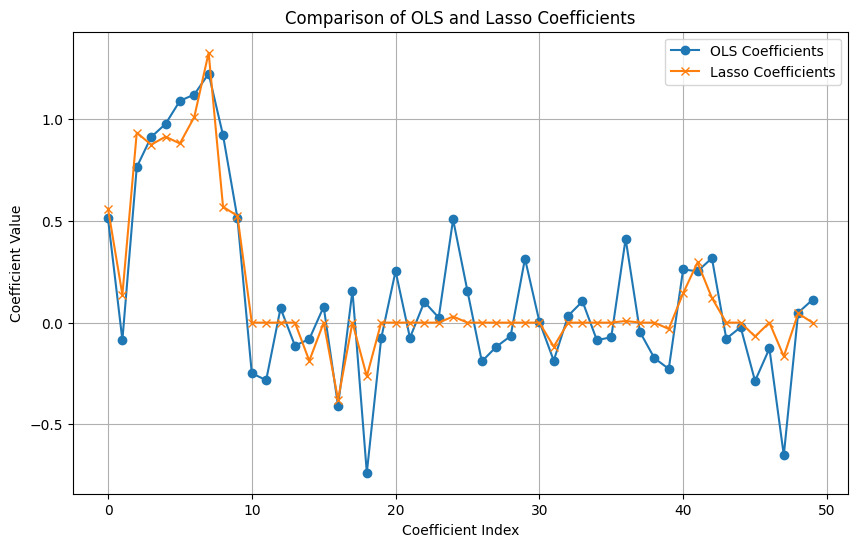

In [4]:
import matplotlib.pyplot as plt

# Assuming `ols` and `lasso_result.coef_` are already defined
plt.figure(figsize=(10, 6))
plt.plot(ols, label='OLS Coefficients', marker='o')
plt.plot(lasso_result.coef_, label='Lasso Coefficients', marker='x')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of OLS and Lasso Coefficients')
plt.legend()
plt.grid(True)
plt.show()

## Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error


C:\Users\zhent\AppData\Local\Temp\ipykernel_10992\2089539295.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Load the data
lianjia = pd.read_csv("data_example/lianjia.csv",encoding='gbk')

# Sampling with a seed for reproducibility
lianjia = lianjia.sample(frac=0.01, random_state=1)

predictors = ["square", "livingRoom", "drawingRoom", "kitchen", "bathRoom",
              "floor_total", "elevator", "ladderRatio",
              "age", "DOM", "followers", "fiveYearsProperty",
              "subway", "district", "Lng", "Lat", "t_trade",
              "communityAverage"]


# Your target variable
target = 'price'

# Prepare your predictor and target datasets
X = lianjia[predictors]
y = lianjia[target]

# Define the hyperparameters
param_grid = {
    # 'max_depth': [10, 20, 40],  # equivalent to interaction.depth in R's gbm
    # 'n_estimators': [1000, 5000, 9000],  # equivalent to n.trees. (number of iterations)
    # 'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],  # equivalent to shrinkage
    # 'min_samples_leaf': [10, 15, 20],  # equivalent to n.minobsinnode

    'max_depth': [10, 20, 40],  # equivalent to interaction.depth in R's gbm
    'n_estimators': [500, 1000],  # equivalent to n.trees. (number of iterations)
    'learning_rate': [0.001,  0.01, 0.1],  # equivalent to shrinkage
    'min_samples_leaf': [10],  # equivalent to n.minobsinnode
}


C:\Users\zhent\AppData\Local\Temp\ipykernel_10992\2364535954.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  lianjia = pd.read_csv("data_example/lianjia.csv",encoding='gbk')


In [ ]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(loss='squared_error', random_state=0)

# Start the timer
start_time = time.time()

# Perform grid search
grid_search = GridSearchCV(estimator = gbm, 
                           param_grid = param_grid, 
                           scoring = 'neg_mean_squared_error', 
                           cv=5,
                           verbose=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

grid_search.fit(X_train, y_train)

# Calculate the time taken
end_time = time.time()
duration = end_time - start_time

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)
print("Time taken:", duration, "seconds")



Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.001, max_depth=10, min_samples_leaf=10, n_estimators=500;, score=-253511878.745 total time=   2.6s
[CV 2/5] END learning_rate=0.001, max_depth=10, min_samples_leaf=10, n_estimators=500;, score=-212811904.343 total time=   2.7s
[CV 3/5] END learning_rate=0.001, max_depth=10, min_samples_leaf=10, n_estimators=500;, score=-207580595.857 total time=   2.8s
[CV 4/5] END learning_rate=0.001, max_depth=10, min_samples_leaf=10, n_estimators=500;, score=-203834085.610 total time=   2.5s
[CV 5/5] END learning_rate=0.001, max_depth=10, min_samples_leaf=10, n_estimators=500;, score=-269730063.831 total time=   2.4s
[CV 1/5] END learning_rate=0.001, max_depth=10, min_samples_leaf=10, n_estimators=1000;, score=-140416783.883 total time=   4.8s
[CV 2/5] END learning_rate=0.001, max_depth=10, min_samples_leaf=10, n_estimators=1000;, score=-108685972.008 total time=   4.8s
[CV 3/5] END learning_rate=0.001, max_dep

In [ ]:

# Fit the linear regression model
lmReg = LinearRegression()
lmReg.fit(X_train, y_train)

# Predict with linear regression model
pred_lm = lmReg.predict(X_test)

# Comparison
r_squared_gbm = r2_score(y_test, pred_boosting)
r_squared_lm = r2_score(y_test, pred_lm)

print("R-squared of GBM prediction =", r_squared_gbm)
print("R-squared of LM prediction =", r_squared_lm)

R-squared of GBM prediction = 0.9038893047465942
R-squared of LM prediction = 0.7869620570884921
